In [209]:
import numpy as np
import pandas as pd

data = pd.read_csv("pass.csv",header=None)
display(data)

,0,1,2,3,4,5,6,7,8,9,10
0,0,3,4,1,0,0,1,0,0,0,0
1,0,0,2,9,1,0,7,5,7,1,0
2,0,2,0,8,5,3,9,1,0,0,1
3,2,3,10,0,2,0,8,2,2,1,0
4,0,4,5,1,0,4,5,1,0,0,5
5,1,2,0,1,2,0,6,0,1,3,1
6,0,13,6,3,7,4,0,3,2,1,3
7,0,3,0,1,1,2,4,0,0,1,0
8,0,4,1,0,0,3,2,1,0,1,0
9,0,1,0,0,2,1,1,0,0,0,2


In [210]:
for col in data:
    data[col] /= data[col].sum()
display(data)
display(data.sum(axis=0))

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.083333,0.142857,0.041667,0.00,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.071429,0.375000,0.04,0.000000,0.152174,0.357143,0.583333,0.111111,0.000000
2,0.000000,0.055556,0.000000,0.333333,0.20,0.176471,0.195652,0.071429,0.000000,0.000000,0.083333
3,0.666667,0.083333,0.357143,0.000000,0.08,0.000000,0.173913,0.142857,0.166667,0.111111,0.000000
4,0.000000,0.111111,0.178571,0.041667,0.00,0.235294,0.108696,0.071429,0.000000,0.000000,0.416667
5,0.333333,0.055556,0.000000,0.041667,0.08,0.000000,0.130435,0.000000,0.083333,0.333333,0.083333
6,0.000000,0.361111,0.214286,0.125000,0.28,0.235294,0.000000,0.214286,0.166667,0.111111,0.250000
7,0.000000,0.083333,0.000000,0.041667,0.04,0.117647,0.086957,0.000000,0.000000,0.111111,0.000000
8,0.000000,0.111111,0.035714,0.000000,0.00,0.176471,0.043478,0.071429,0.000000,0.111111,0.000000
9,0.000000,0.027778,0.000000,0.000000,0.08,0.058824,0.021739,0.000000,0.000000,0.000000,0.166667


0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
dtype: float64

0     0.139221
1     0.415168
2     0.371257
3     0.412052
4     0.310717
5     0.246414
6     0.500558
7     0.167952
8     0.167886
9     0.114968
10    0.152317
dtype: float64

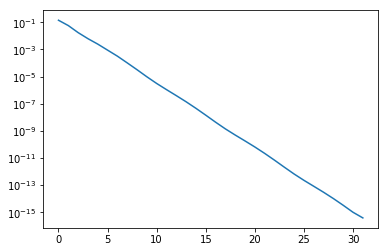

In [211]:
import matplotlib.pyplot as plt

P = data
n = len(P)
e = np.ones([n,n])
x = np.ones([n])
v = x
thresh = 10**-15
a= 0.85

# グーグル行列の計算
A = ((1-a)/n *e) + P*a

# べき乗法によるページランクベクトルの計算
mem = []
for k in range(10000):
    x = A @ x
    x /= np.linalg.norm(x)
    r = np.linalg.norm(A@x-x)
    mem.append(r)
    if r<thresh :
        break

display(x)
plt.plot(mem)
plt.yscale('log')
plt.show()